# Random Forest Model

In [2]:

import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'

# Read in merged file
df = pd.read_csv(folder_path + 'activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'hr_duration_(s)', 'max_hr', 'min_hr', 'totalSteps', 'stepsTotalDuration', 'totalDistance', 'dwrTotalDuration', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

print(df.head())
print(df.shape)

                          participantId  bodyMass_kg  height_m        bmi  \
0  00a55fb5-da33-4e2e-ae61-28f589fcc174       51.256    1.5748  20.667783   
1  00fd4039-9b5e-4bbb-8295-4983a3f58371       59.874    1.6510  21.965653   
2  02d5125e-684f-4166-a3b7-5df1bcfc1661       59.874    1.7018  20.673844   
3  080292d4-a0b0-4dd7-a7dd-191c8ac71664       77.111    1.8034  23.710036   
4  080bacc1-4661-4735-acca-7d27ad1a4192       90.718    1.8034  27.893906   

   mean_hr/s  hr_duration_(s)  max_hr  min_hr  totalSteps  stepsTotalDuration  \
0   1.438426             47.0   1.783   1.017      4454.0              6366.0   
1   1.290195             41.0   1.517   1.150        61.0              1441.0   
2   1.107266             64.0   1.783   0.617     10790.0             20098.0   
3   1.056040            176.0   1.967   0.850      3819.0              7895.0   
4   1.179194             72.0   1.883   0.900     12734.0             14412.0   

   ...  wake_up_choices  wake_ups  weekly_naps  no

In [3]:
# Train test split

from sklearn.model_selection import GroupKFold, GridSearchCV

gkf = GroupKFold(n_splits=10)


In [4]:
# X - features

X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','stepsTotalDuration','totalDistance','dwrTotalDuration', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=1000, random_state=42)

# Lists to store evaluation metrics
train_scores = []
test_scores = []
train_predicted_vals = []
train_actual_vals = []
test_predicted_vals = []
test_actual_vals = []



In [18]:

for i, train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}, group={groups[train_index]}")
    print(f"  Test:  index={test_index}, group={groups[test_index]}")
    rf.fit(X_train, y_train)

    train_pred = rf.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_pred, squared=False)
    train_scores.append(train_rmse)

    # Evaluate on test data

    test_pred = rf.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_pred, squared=False)
    test_scores.append(test_rmse)

    # Predicted and actual values
    train_predicted_vals.extend(train_pred)
    train_actual_vals.extend(y_train)
    test_predicted_vals.extend(test_pred)
    test_actual_vals.extend(y_test)



# Average scores
avg_train_rmse = sum(train_scores)/len(train_scores)
avg_test_rmse = sum(test_scores)/len(test_scores)

print("Average Train RMSE:", avg_train_rmse)
print("Average Test RMSE: ", avg_test_rmse)
    

Average Train RMSE: 0.316344522434086
Average Test RMSE:  1.0427055329231047


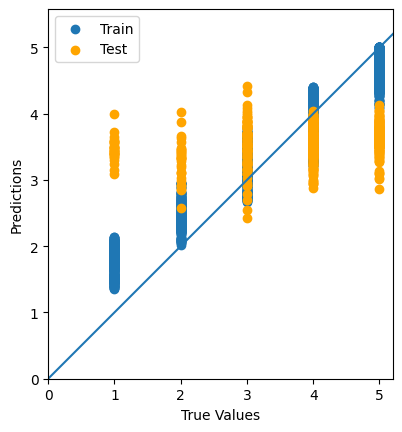

In [ ]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


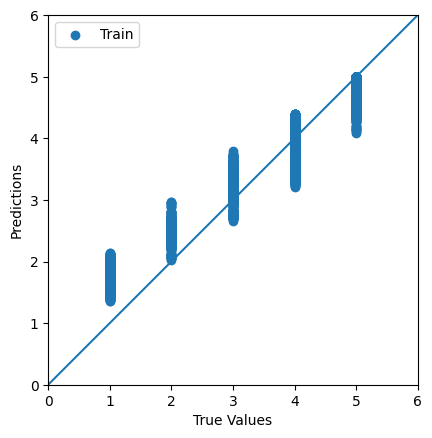

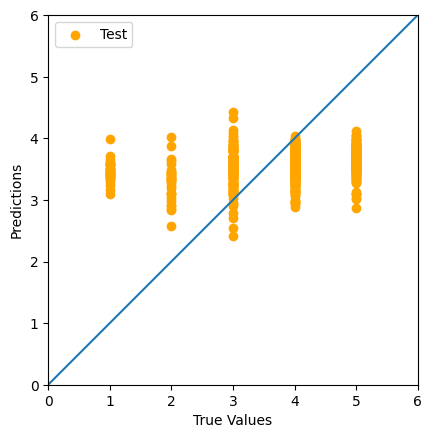

In [ ]:
# Plot the results

import matplotlib.pyplot as plt

plt.scatter(train_actual_vals, train_predicted_vals, label = 'Train')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()


# Plot the results

import matplotlib.pyplot as plt

plt.scatter(test_actual_vals, test_predicted_vals, label= 'Test', color='orange')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,6])
plt.ylim([0,6])
_ = plt.plot([-100, 100], [-100, 100])
plt.legend()
plt.show()



Find out results for each datapoint

In [ ]:
import pandas as pd

indexed_predictions = pd.DataFrame(indexed_predictions)

print(indexed_predictions.head())

NameError: name 'indexed_predictions' is not defined